# Part I - Prosper Loan Data Exploration
## by Maurice Otsieno

## Introduction

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.



## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# load in the dataset into a pandas dataframe, print statistics
prosper_loan = pd.read_csv('prosperLoanData.csv')

In [3]:
# high-level overview of data shape and composition
print(prosper_loan.shape)
print(prosper_loan.dtypes)
prosper_loan.head(10)

(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   
6  0F0A3576754255009D63151         750899  2013-04-12 09:52:56.147000000   
7  0F1035772717087366F9EA7         768193  2013-05-05 06:49:27.493000000   
8  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
9  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   
5         NaN    60    Current                  NaN      0.15425   
6         NaN    36    Current                  NaN      0.31032   
7         NaN    36    Current                  NaN      0.23939   
8         NaN    36    Current                  NaN      0.07620   
9         NaN    36    Current                  NaN      0.07620   

   BorrowerRate  LenderYield    ...     LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380    ...            -133.18                0.0   
1        0.0920       0.0820    ...               0.00                0.0   
2        0.2750       0.2400    ...             -24.20                0.0   
3        0.0974       0.0874    ...            -108.01                0.0   
4        0.2085       0.1985    ...             -60.27                0.0   
5        0.1314       0.1214    ...             -25.33                0.0   
6        0.2712       0.2612    ...             -22.95                0.0   
7        0.2019       0.1919    ...             -69.21                0.0   
8        0.0629       0.0529    ...             -16.77                0.0   
9        0.0629       0.0529    ...             -16.77                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   
5                    0.0                  0.0                             0.0   
6                    0.0                  0.0                             0.0   
7                    0.0                  0.0                             0.0   
8                    0.0                  0.0                             0.0   
9                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   
5            1.0                0                          0   
6            1.0                0                          0   
7            1.0                0                          0   
8            1.0                0                          0   
9            1.0                0                 

In [4]:
# check if LoanStatus is categorical. It is.
prosper_loan.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [5]:
# check if CreditGrade is categorical. It is.
prosper_loan.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [6]:
# Statistical description of prosper_loan data
print(prosper_loan.describe())

       ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.

### What is the structure of your dataset?

There are 113937 obsevations in the data set with 81 attributes. It is seen that most variables are categorical, while other are numeric. 

### What is/are the main feature(s) of interest in your dataset?


I'm going to look at those attributes that will derive a meaningful insights for the data. I want to know the status of those who takes the loan in different categories.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I'm going to focus on the following attributes:Term, LoanStatus, Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue, BorrowerAPR, ListingCategory, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CreditScoreRangeLower,CreditScoreRangeUpper, IncomeRange, IncomeVerifiable, StatedMonthlyIncome, LoanNumberLoanOriginalAmount, LoanOriginationDate, MonthlyLoanPayment, InvestmentFromFriendsCount, Recommendations and Investors

## Univariate Exploration

We look at the distribution of loan original amount

In [7]:
prosper_loan['LoanOriginalAmount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

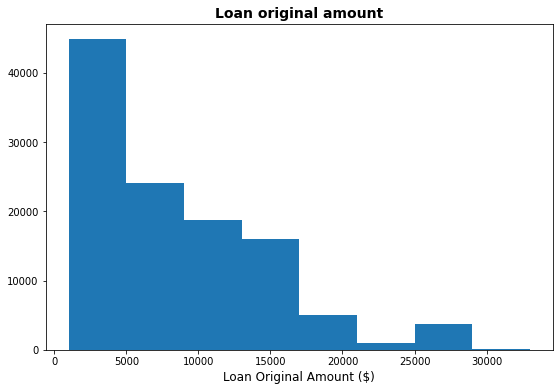

In [8]:
# start with a standard-scaled plot
plt.figure(figsize=[20, 6])
plt.subplot(1,2,1)
binsize = 1000
bins = np.arange(1000, prosper_loan['LoanOriginalAmount'].max()+binsize, 4000)
plt.hist(data = prosper_loan, x = 'LoanOriginalAmount', bins = bins )
plt.xlabel('Loan Original Amount ($)', fontsize=12)
plt.title('Loan original amount', fontsize=14, fontweight='heavy')
plt.show()

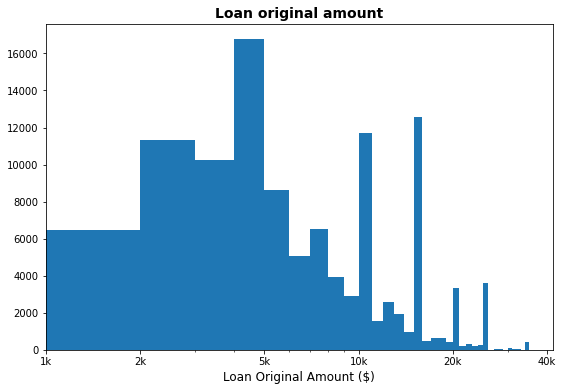

In [9]:
# It is hard to interpret. Let's Scale the x-axis
plt.figure(figsize=[20, 6])
plt.subplot(1,2,2)
bins = np.arange(1000, prosper_loan['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data = prosper_loan, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([1000, 2000, 5000, 10000, 20000, 40000 ],
           ['1k', '2k', '5k', '10k', '20k', '40k'])
plt.xlim(1000,)
plt.xlabel('Loan Original Amount ($)', fontsize=12)
plt.title('Loan original amount', fontsize=14, fontweight='heavy')
plt.show()

From the histogram we can see that most people apply for loan within the range of 1K dollars to 5K dollars

## There is alot of outliers and some attributes that we do not need. Thefore we shall need to clean that data first before we proceed

In [10]:
# Let's create a copy of the prosperLoan data
loan_copy = prosper_loan.copy()
loan_copy.head(5)

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield    ...     LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380    ...            -133.18                0.0   
1        0.0920       0.0820    ...               0.00                0.0   
2        0.2750       0.2400    ...             -24.20                0.0   
3        0.0974       0.0874    ...            -108.01                0.0   
4        0.2085       0.1985    ...             -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [11]:
# Our chosen variables for analysis
attributes = ['LoanNumber', 'ListingCreationDate','ListingCategory (numeric)', 
          'LoanStatus', 'BorrowerAPR', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
          'CreditScoreRangeLower', 'CreditScoreRangeUpper','IncomeRange', 'IncomeVerifiable',
          'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationDate','Term',
          'MonthlyLoanPayment','InvestmentFromFriendsCount', 'Recommendations', 'Investors', 'ClosedDate']

In [12]:
# Create dataframe with our chosen attributes
loan_data = loan_copy[attributes]

In [13]:
# Re-arranging the loan data
loan_data = loan_data.reindex(columns = attributes)

In [14]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 21 columns):
LoanNumber                    113937 non-null int64
ListingCreationDate           113937 non-null object
ListingCategory (numeric)     113937 non-null int64
LoanStatus                    113937 non-null object
BorrowerAPR                   113912 non-null float64
EmploymentStatus              111682 non-null object
EmploymentStatusDuration      106312 non-null float64
IsBorrowerHomeowner           113937 non-null bool
CreditScoreRangeLower         113346 non-null float64
CreditScoreRangeUpper         113346 non-null float64
IncomeRange                   113937 non-null object
IncomeVerifiable              113937 non-null bool
StatedMonthlyIncome           113937 non-null float64
LoanOriginalAmount            113937 non-null int64
LoanOriginationDate           113937 non-null object
Term                          113937 non-null int64
MonthlyLoanPayment            113937 non-nul

In [15]:
# Check for duplicate using LoanNumber. We are using LoanNumber because it represents Unique numeric value associated with a loan.
loan_data['LoanNumber'].duplicated().sum()

871

In [16]:
# Check for null values
loan_data.isnull().sum()

LoanNumber                        0
ListingCreationDate               0
ListingCategory (numeric)         0
LoanStatus                        0
BorrowerAPR                      25
EmploymentStatus               2255
EmploymentStatusDuration       7625
IsBorrowerHomeowner               0
CreditScoreRangeLower           591
CreditScoreRangeUpper           591
IncomeRange                       0
IncomeVerifiable                  0
StatedMonthlyIncome               0
LoanOriginalAmount                0
LoanOriginationDate               0
Term                              0
MonthlyLoanPayment                0
InvestmentFromFriendsCount        0
Recommendations                   0
Investors                         0
ClosedDate                    58848
dtype: int64

### Quality Issues
1. There is duplication in LoanNumber
2. There are boolean datatype in IsBorrowerHomeowner and IncomeVerifiable columns. Convert to String
3. Irrelevant minutes, seconds and zero appears in ListingCreationDate
4. Irrelevant minutes, seconds and zero appears in LoanOriginationDate 
5. There are observations with missing values. Should be dropped
6. BorowerAPR is in 5 decimal place. It is better to be in to 2 decimal place

### Tidyness Issues
1. CreditScoreRangeLower and CreditScoreRangeUpper should be merged to form a new column, so that to get the credit score range
2. The listing category is in numeric format. We need to replace the numbers with the categories they represent and then convert to categorical data type.
3. Some of the observations do not have closed date. We should remove ClosedDate column

### Cleaning data

#### Quality #1:
Duplicated LoanNumber

#### Define
Remove duplicated, keeping only first entry

#### Code

In [17]:
loan_data.drop_duplicates(subset='LoanNumber', keep='first', inplace=True)

#### Test

In [18]:
loan_data['LoanNumber'].duplicated().sum()

0

#### Quality #2:
There are boolean datatype in IsBorrowerHomeowner and IncomeVerifiable columns.

#### Define
Convert to String

#### Code

In [19]:
# Convert Boolean data type to string
loan_data['IsBorrowerHomeowner'] = loan_data['IsBorrowerHomeowner'].map({True: 'Home-Owner', False: 'Not-Home-Owner'})
loan_data['IncomeVerifiable'] = loan_data['IncomeVerifiable'].map({True: 'Verifiable', False: 'Not-Verifiable'})

#### Test

In [20]:
print(loan_data[['IsBorrowerHomeowner', 'IncomeVerifiable' ]].dtypes)
loan_data[['IsBorrowerHomeowner', 'IncomeVerifiable']].head(3)

IsBorrowerHomeowner    object
IncomeVerifiable       object
dtype: object


IsBorrowerHomeowner IncomeVerifiable
0          Home-Owner       Verifiable
1      Not-Home-Owner       Verifiable
2      Not-Home-Owner       Verifiable

#### Quality #3 and #4
Irrelevant minutes, seconds and zero appears in ListingCreationDate and LoanOriginationDate

#### Define
We remove the minutes and Zeros, then convert to DateTime.

#### Code

In [21]:
def remover(col1, val1, col2, val2):
    import datetime as dt
    for column in loan_data[[col1, col2]]:
        if column == col1:
            loan_data[column] = loan_data[column].str[:val1]
            loan_data[column] = loan_data[column].astype('datetime64[D]')
        elif column == col2:
            loan_data[column] = loan_data[column].str[:val2]
            loan_data[column] = loan_data[column].astype('datetime64[D]')
        else:
            column = column

In [22]:
# Calling the function created
remover('ListingCreationDate',  -19, 'LoanOriginationDate', -9)

#### Test

In [23]:
print(loan_data[['ListingCreationDate','LoanOriginationDate']].dtypes)
loan_data[['ListingCreationDate','LoanOriginationDate']].head(3)

ListingCreationDate    datetime64[ns]
LoanOriginationDate    datetime64[ns]
dtype: object


ListingCreationDate LoanOriginationDate
0          2007-08-26          2007-09-12
1          2014-02-27          2014-03-03
2          2007-01-05          2007-01-17

#### Quality #5
Observations with missing values

#### Define
Drop observations with missing values

#### Code

In [24]:
loan_data.dropna(axis=0, inplace=True)

#### Test

In [25]:
loan_data.isnull().sum()

LoanNumber                    0
ListingCreationDate           0
ListingCategory (numeric)     0
LoanStatus                    0
BorrowerAPR                   0
EmploymentStatus              0
EmploymentStatusDuration      0
IsBorrowerHomeowner           0
CreditScoreRangeLower         0
CreditScoreRangeUpper         0
IncomeRange                   0
IncomeVerifiable              0
StatedMonthlyIncome           0
LoanOriginalAmount            0
LoanOriginationDate           0
Term                          0
MonthlyLoanPayment            0
InvestmentFromFriendsCount    0
Recommendations               0
Investors                     0
ClosedDate                    0
dtype: int64

#### Quality #6
BorowerAPR is in 5 decimal place

#### Define
Round BorowerAPR to 2 decimal place

#### Code

In [26]:
loan_data['BorrowerAPR'] = round(loan_data['BorrowerAPR'], 2)

#### Test

In [27]:
loan_data['BorrowerAPR'].head(3)

0     0.17
11    0.15
15    0.36
Name: BorrowerAPR, dtype: float64

#### Tidyness #1
CreditScoreRangeLower and CreditScoreRangeUpper should be merged to form a new column, so that to get the credit score range

#### Define
Merge CreditScoreRangeLower and CreditScoreRangeUpper

#### Code

In [28]:
# Create copy of columns as temporary columns 
loan_data['CreditScoreRangeUpper1'] = loan_data['CreditScoreRangeUpper'].astype(str)
loan_data['CreditScoreRangeLower1'] = loan_data['CreditScoreRangeLower'].astype(str)

# Create the CreditScoreRange column
loan_data['CreditScoreRange'] = loan_data['CreditScoreRangeLower1'].str[:-2] + " - " + loan_data['CreditScoreRangeUpper1'].str[:-2]

# Droping temporary columns
loan_data.drop(['CreditScoreRangeUpper1', 'CreditScoreRangeLower1'], axis=1, inplace=True)

# Droping CreditScoreRangeUpper and CreditScoreRangeLower columns
loan_data.drop(['CreditScoreRangeUpper', 'CreditScoreRangeLower'], axis=1, inplace=True)


#### Test

In [29]:
loan_data[['CreditScoreRange']].head()

CreditScoreRange
0         640 - 659
11        640 - 659
15        700 - 719
21        620 - 639
23        680 - 699

In [30]:
# Let's index
loan_data['CreditScoreRange'].value_counts().index

csr = ['520 - 539','540 - 559', '560 - 579', '580 - 599','620 - 639', 
       '600 - 619','640 - 659', '660 - 679','680 - 699','700 - 719', 
       '720 - 739','740 - 759', '760 - 779','780 - 799','800 - 819',
       '820 - 839', '840 - 859', '860 - 879', '880 - 899']

for item in csr:
    csre = pd.api.types.CategoricalDtype(ordered = True, categories = csr)
    
loan_data['CreditScoreRange'] = loan_data['CreditScoreRange'].astype(csre)

In [31]:
loan_data[['CreditScoreRange']].head(3)

CreditScoreRange
0         640 - 659
11        640 - 659
15        700 - 719

#### Tidyness #2
The listing category is in numeric format

#### Define
 Replace the numbers with the categories they represent and then convert to categorical data type

#### Code

In [32]:
# From data dictionary we have ListingCategory (numeric)
'''
0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 
5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 
11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 
15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
'''

# Let's create replacement dictionary
replace_dict = {
    0: "Not Available", 1: "Debt Consolidation", 2: "Home Improvement", 3: "Business",
    4: "Personal Loan", 5: "Student Use", 6: "Auto", 7: "Other",
    8: "Baby&Adoption", 9: "Boat", 10: "Cosmetic Procedure", 11: "Engagement Ring",
    12: "Green Loans", 13: "Household Expenses", 14: "Large Purchases", 15: "Medical/Dental",
    16: "Motorcycle", 17: "RV", 18: "Taxes", 19: "Vacation", 20: "Wedding Loans"
}

# Make replacement call
loan_data['ListingCategory (numeric)'].replace(replace_dict, inplace=True)

# Converting to categorical data type
list_cat1 = replace_dict.values()
for item in list_cat1:
    list_cat2 = pd.api.types.CategoricalDtype(ordered = False, categories = list_cat1)
    
loan_data['ListingCategory (numeric)'] = loan_data['ListingCategory (numeric)'].astype(list_cat2)
loan_data.rename({'ListingCategory (numeric)':'ListingCategory'}, axis=1, inplace=True)

#### Test

In [33]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47299 entries, 0 to 113935
Data columns (total 20 columns):
LoanNumber                    47299 non-null int64
ListingCreationDate           47299 non-null datetime64[ns]
ListingCategory               47299 non-null category
LoanStatus                    47299 non-null object
BorrowerAPR                   47299 non-null float64
EmploymentStatus              47299 non-null object
EmploymentStatusDuration      47299 non-null float64
IsBorrowerHomeowner           47299 non-null object
IncomeRange                   47299 non-null object
IncomeVerifiable              47299 non-null object
StatedMonthlyIncome           47299 non-null float64
LoanOriginalAmount            47299 non-null int64
LoanOriginationDate           47299 non-null datetime64[ns]
Term                          47299 non-null int64
MonthlyLoanPayment            47299 non-null float64
InvestmentFromFriendsCount    47299 non-null int64
Recommendations               47299 non-

#### Tidyness #3
Some of the observations do not have closed date

#### Define
We should remove ClosedDate column

#### Code

In [34]:
loan_data.drop('ClosedDate', axis=1, inplace=True)

#### Test

In [35]:
loan_data.head(3)

LoanNumber ListingCreationDate     ListingCategory LoanStatus  \
0        19141          2007-08-26       Not Available  Completed   
11       20907          2007-10-09       Not Available  Completed   
15       63982          2012-04-10  Household Expenses  Defaulted   

    BorrowerAPR EmploymentStatus  EmploymentStatusDuration  \
0          0.17    Self-employed                       2.0   
11         0.15        Full-time                      19.0   
15         0.36            Other                     121.0   

   IsBorrowerHomeowner     IncomeRange IncomeVerifiable  StatedMonthlyIncome  \
0           Home-Owner  $25,000-49,999       Verifiable          3083.333333   
11      Not-Home-Owner       $1-24,999       Verifiable          1666.666667   
15          Home-Owner  $50,000-74,999       Verifiable          5500.000000   

    LoanOriginalAmount LoanOriginationDate  Term  MonthlyLoanPayment  \
0                 9425          2007-09-12    36              330.43   
11                1000          2007-10-18    36               33.81   
15                4000          2012-04-19    36              173.71   

    InvestmentFromFriendsCount  Recommendations  Investors CreditScoreRange  
0                            0                0        258        640 - 659  
11                           0                0         53        640 - 659  
15                           0                0         10        700 - 719

In [36]:
# Shape
loan_data.shape

(47299, 19)

#### Now lets store our clean data

In [37]:
loan_data.to_csv('cleaned_loan_data.csv')

### Continue with Univariate exploration

#### Let's find out the reasons why loans were applied for, on the prosper
We shall plot the percentage(%) of loan applicatins by Listing Category
and the top 10 Listing Category with Loan Applications

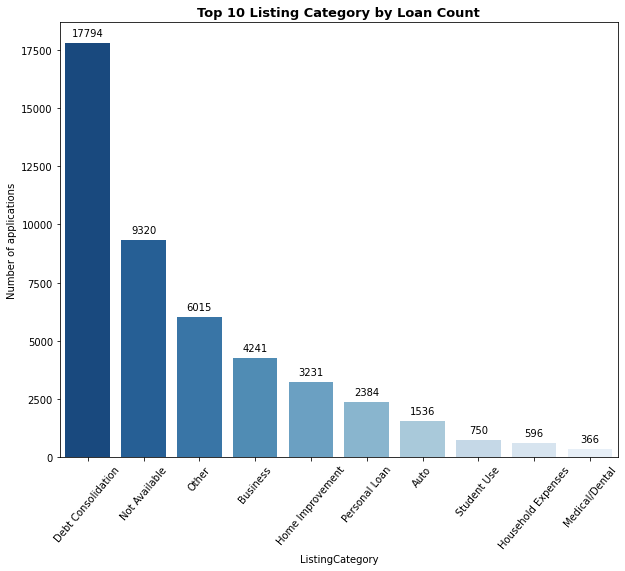

In [38]:
# Plotting the Top 10 Listing Category by Loan Counts
plt.figure(figsize=[10,8])
ax = sb.countplot(data= loan_data, x='ListingCategory', 
             order=loan_data['ListingCategory'].value_counts().iloc[:10].index,
             palette = 'Blues_r',
            )
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xticks(rotation=50)
plt.ylabel('Number of applications')
plt.title('Top 10 Listing Category by Loan Count',  fontsize=13,fontweight='heavy')
plt.show()

From the graph we can see that most loans are taken for the reason as Debt Consolidation followed by no reason (Not available) and then other reasons. Least reason for applying for the loan is for medical/Dental

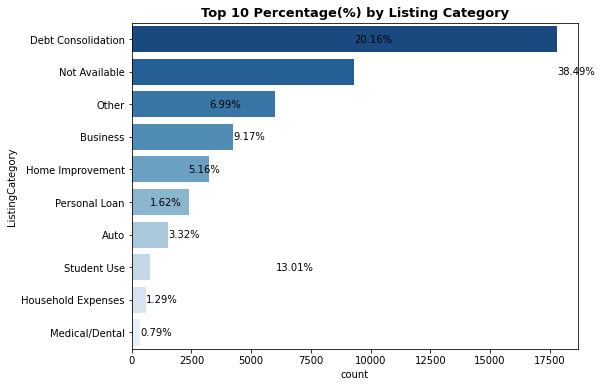

In [39]:
# Percentage(%) of loan applications by Listing Category

base_color = sb.color_palette()[9]

# count of the categories in ListingCategory Column
list_count = loan_data['ListingCategory'].value_counts().iloc[:10]

plt.figure(figsize=[8,6])

sb.countplot(data= loan_data, y='ListingCategory', 
             order=list_count.iloc[:10].index,
             palette='Blues_r')
# Adding anotations to the plot
for i in range (list_count.shape[0]):
    count = list_count[i]
    # Convert count into string
    ct_string = '{:0.2f}'.format(100*(count/list_count.sum()))
    # Print the string value on the bar. 
    plt.text(count+1, i, (ct_string+'%'), va='center')
plt.title('Top 10 Percentage(%) by Listing Category',  fontsize=13,fontweight='heavy')
plt.show()

From the graph, large number of people could not give the reason as to why they are applying for the loan as shown by category 'Not Available'

#### We need also to find in which employment category we have the most applicants by what percentage

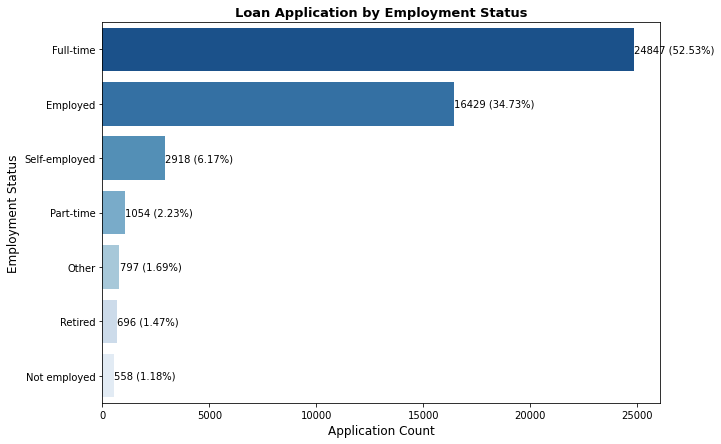

In [40]:
list_count = loan_data.EmploymentStatus.value_counts()

plt.figure(figsize=[10,7])
sb.countplot(data= loan_data, y='EmploymentStatus', 
             order=list_count.index,
             palette='Blues_r')
for i in range (list_count.shape[0]):
    count = list_count[i]
    ct_string = '{:0.0f}'.format(count)
    pct = (100*(count/list_count.sum()))
    pct_string = '{:0.2f}'.format(pct)
    plt.text(count+1, i, (ct_string)+' ('+pct_string+'%)', va = 'center')
plt.title('Loan Application by Employment Status', fontweight='bold', fontsize=13)
plt.xlabel('Application Count', fontsize=12)
plt.ylabel('Employment Status', fontsize=12)
plt.show()

From the graph we see that most loans were taken by full-time employed people.

In [41]:
# Let's check the trend of CreditScore range on loan application  
cr_count = loan_data.groupby(['CreditScoreRange'], as_index=False)['LoanOriginalAmount'].sum()
cr_count['Percentage'] = round(((cr_count['LoanOriginalAmount'] / cr_count['LoanOriginalAmount'].sum())*100), 2)
cr_count['%'] = cr_count['Percentage'].astype(str) + '%'
cr_count

# Create the plot
plt.figure(figsize=[12,10])
cr_count = loan_data['CreditScoreRange'].value_counts()
ax=sb.countplot(data= loan_data, y='CreditScoreRange', color=sb.color_palette()[0])
plt.xlabel('Loan Count', fontsize=12)
plt.ylabel('Credit Score Range', fontsize=12)
plt.title('Loan Count By Credit Score Range', fontweight='bold', fontsize=13);

for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center");

From the graph, most people who apply for the loan are of the credit score between 640 to 699 Those with highest credit score range are the least on loan application

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

There was outliers seen in Original Loan Amount. I had to transform the amount to 1k dollar multiple and this helped in having bimodal distribution.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The data was untidy. I had to clean and remove those features of less interest. There was duplication in LoanNumber.
Irrelevant minutes, seconds and zero appears in ListingCreationDate and Irrelevant minutes, seconds and zero appears in LoanOriginationDate
There was also observations with missing values which needed to be dropped.BorowerAPR was in 5 decimal place. It is better to be in to 2 decimal place. All these was done to help in enhancing proper visualizations and to help in data exploration. It is hard to expo

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### Let's start by looking at the pairwise correlations present between features in the data.

In [42]:
#To create a table showing the correlation  significance amongst variables
numeric_vars = ['BorrowerAPR', 'IncomeRange', 'LoanOriginalAmount', 'Term', 'MonthlyLoanPayment', 'Investors', 'CreditScoreRange']
categoric_vars = ['ListingCategory', 'LoanSatus', 'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeVerifiable']

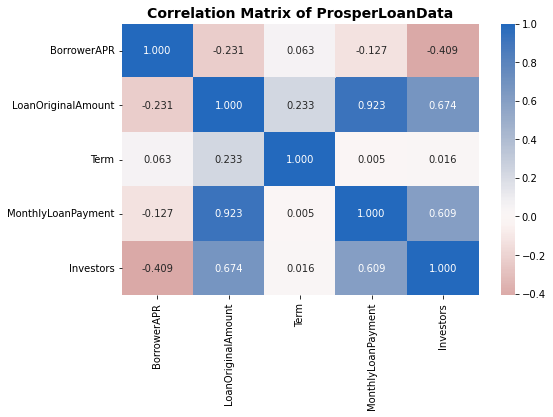

In [43]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(loan_data[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix of ProsperLoanData', fontweight='heavy', fontsize=14);
plt.show()

From the correlation matrix.

The the number of investors for a loan is mostly determined by the Loan Original Amount, then by the stated monthly income of the applicants. We can say that the larger a loan amount is, the higher the number of investors who would invest in the loan. However, the stated monthly income of an applicant has a degree of impresion on investors.

We can also observe strong corralation between the number of friends who invest in a loan and the number of recomendations. This simply means that friends who invest in a loan are most likely to make a recomendation.

#### What determines the loan amount applied for by applicants on the prosper

In [44]:
# plot matrix: sample 400 loan data so that plots are clearer and they render faster
print("loan_data.shape=",loan_data.shape)
loanData_samp = loan_data.sample(n=400, replace = False)
print("loanData_samp.shape=",loanData_samp.shape)

g = sb.PairGrid(data = loanData_samp, vars = ['LoanOriginalAmount', 'StatedMonthlyIncome', 'BorrowerAPR', 'MonthlyLoanPayment', 'Term', 'Investors'])
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

g.fig.subplots_adjust(top=0.92)
g.fig.suptitle("Relationship Matrix", 
               fontweight='bold');

loan_data.shape= (47299, 19)
loanData_samp.shape= (400, 19)


From the diagram, we can see a strong correlation between MonthlyLoanPayment and LoanOriginalAmount, Investors and LoanOriginalAmount and others relations as displayed

In [51]:
# plot matrix of numeric features against categorical features.

LoanData_samp = loan_data.sample(n=2000, replace = False)


def boxgrid(x, y, **kwargs):
   
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = LoanData_samp, y_vars = ['BorrowerAPR', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'Investors'], x_vars = ['IsBorrowerHomeowner', 'IncomeVerifiable', 'LoanStatus'],
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

<Figure size 720x720 with 0 Axes>

In [53]:
LoanData_samp = loan_data.sample(n=2000, replace = False)


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = LoanData_samp, y_vars = ['BorrowerAPR', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'Investors'], x_vars = ['EmploymentStatus'],
                height = 5, aspect = 1.5)
g.map(boxgrid)
plt.show();

<Figure size 720x720 with 0 Axes>

It looks like some categorical variable have negative relation with with numerical variales of interest. Self employed has positive relation with all variables

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

It has been observed that applicants with verifiable income has more counts in terms of clompleted loan repayments.Applicants with Income Not-Verifiable has relavely larger number of charged off loans.

This means that investors were more willing to invest in loans whose borrower's income were verifiable


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

 #### Let's look at the significant relationship does the loan original amount and monthly repayment has with the loan term and Home-Owner Status on the prosper

In [55]:
plt.figure(figsize=[20,8])

plt.subplot(1,2,1)
sb.scatterplot(data=loan_data, x='LoanOriginalAmount', y='MonthlyLoanPayment', 
               hue='Term', palette="deep");
plt.title('The Loan-Term Significance on Loan and Monthly Repayment Amount', fontweight='bold', fontsize=14)
plt.xlabel('Loan Original Amount ($)', fontsize=13)
plt.ylabel('Monthly Repayment Amount ($)', fontsize=13)

plt.subplot(1,2,2)
sb.scatterplot(data=loan_data, x='LoanOriginalAmount', y='MonthlyLoanPayment', 
               hue='IsBorrowerHomeowner', palette="hls")
plt.title('Home-Owner Status Significance on Monthly Repayment Amount', fontweight='bold', fontsize=14);
plt.xlabel('Loan Original Amount ($)', fontsize=13)
plt.ylabel('Monthly Repayment Amount ($)', fontsize=13);

#### Employment category that has the highest number of completed, defaulted and chargedoff loans

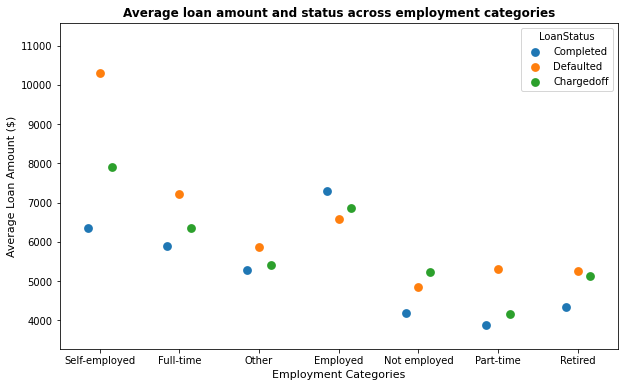

In [57]:
# Plot a point plot
local = loan_data[loan_data['LoanStatus'] != 'Cancelled']
plt.figure(figsize=[10,6])
ax = sb.pointplot(data = local , x = 'EmploymentStatus', y = 'LoanOriginalAmount', hue = 'LoanStatus', 
                  dodge = 0.3, errwidth=False, linestyles = "")

plt.xlabel('Employment Categories', fontsize=11)
plt.ylabel('Average Loan Amount ($)', fontsize=11)
plt.title('Average loan amount and status across employment categories' ,fontweight='bold', fontsize=12);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

From the plot on the left,"The Loan-Term Significance on Loan and Monthly Repayment Amount", we observe that the shorther the loan term, the higher the monthly repayment amount.

From the plot on the right, "Home-Owner Status Significance on Monthly Repayment Amount", we can observe that Home-Owners are more likely to apply for loans with term above twelve(12) months.The loan with the highest amount was taken by a Home Owner.

From the plot "Average loan amount and status across employment categories", we can observe that we have more completed loans from borrowers under the 'Employed' category.Borrowers that are Not Employed have the most charged of loans.
For all other categories except 'employed and not-employed', have more loans that are defaulted.


## Conclusions
The shorther the loan term, the higher the monthly repayment amount.
Borrowers that are not employed have the most charged of loans.
Applicants with verifiable income has more counts in terms of clompleted loan repayments.

The the number of investors for a loan is mostly determined by the Loan Original Amount, then by the stated monthly income of the applicants. We can say that the larger a loan amount is, the higher the number of investors who would invest in the loan. 
Most of the borrowers apply for loan withinh the range of 1K to 5K (USD)
However, the stated monthly income of an applicant has a degree of impresion on investors.